# How to control a moving camera for the animation
This tutorial showcases the control of a moving camera postion for the
export_animation method. It assumes that you have reviewed the previous tutorials and are somewhat familiar with the basic workflow.


In [13]:
import xarray as xr
from glacier3dviz.tools import Glacier3DViz

### Load the data and create the Glacier3DViz object
ds_igm_glacier = xr.open_dataset("igm_dummy_data.nc")

viz = Glacier3DViz(
    ds_igm_glacier,  # dataset for visualization
    x='x',  # x-coordinate name, default is 'x'
    y='y',  # y-coordinate name, default is 'y'
    time='time',  # time coordinate name, default is 'time'
    topo_bedrock='topg',  # bedrock data variable, default is 'bedrock'
    #use_texture=True,  # utilize background map (satellite imagery) for topography texture
    ice_thickness='thk',  # evolving ice thickness variable, default is 'simulated_thickness'
    time_var_display='time',  # time format displayed, opting for total years here
    camera_args={  # camera view settings, more details later
        'azimuth': -135, # rotate around the z-axis
        'elevation': 20,  # elevation angle above ground
    }
)
viz.show()

In [8]:
# get the normalized coordinates of the camera position
viz.get_camera_position(normalized=True, reference_axis='y-axis')


(np.float32(3.004778), np.float32(3.0660434), np.float32(34.375282))

## Linear camera movement
Define the start and end point of camera movement. The x and y coordinates of
the camera are normalized by the longest axis of the map and the z axis is
normalized by the elevation range of the map. Which mean, that  (0,0,0) represents
 the center of the map and (1,1,1) a corner. Note: The camera will always face the
 center of the map.

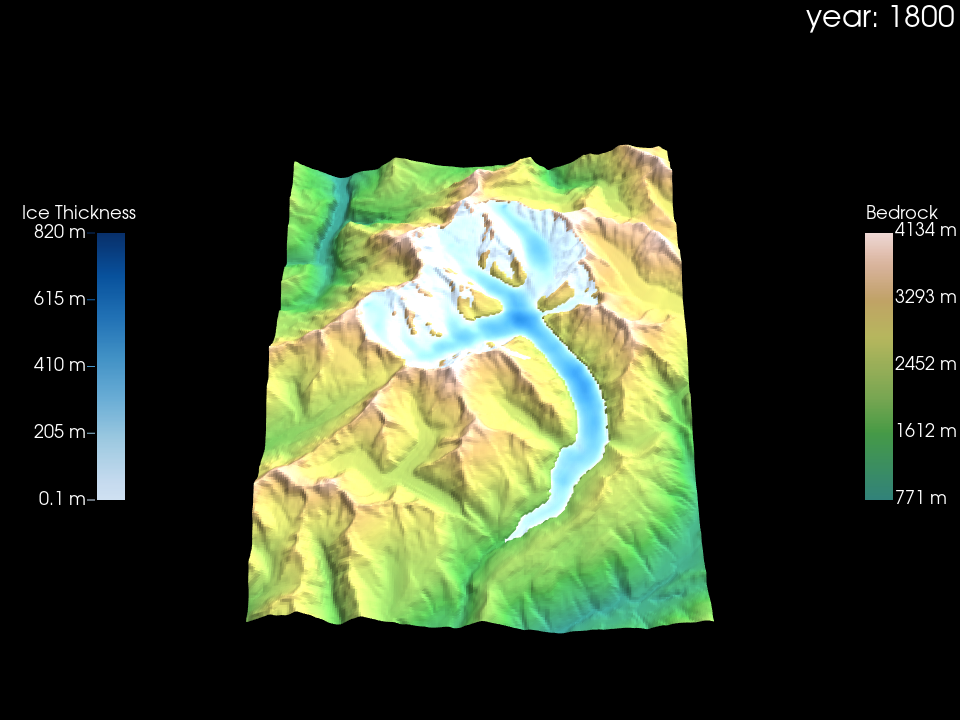

In [14]:
kwargs_linear_camera_trajectory = dict(start_point=(0, -1, 10),
                                       end_point=(0, -0.5, 5))

viz.export_animation(filename='linear_moving_camera_example.mp4',
                     camera_trajectory='linear',
                     kwargs_camera_trajectory=kwargs_linear_camera_trajectory
                     )

## Rotating map
Define that start and end angle of the camera. You can also adjust the height and
radius (distance form the center) of the camera. The camera will circle the map
according to the parameters. Camera_radius_reference can be 'x-axis' or 'y-axis',
this scales all coordinates with the same range so that the camera circle is an
actual circle and not an ellipse.

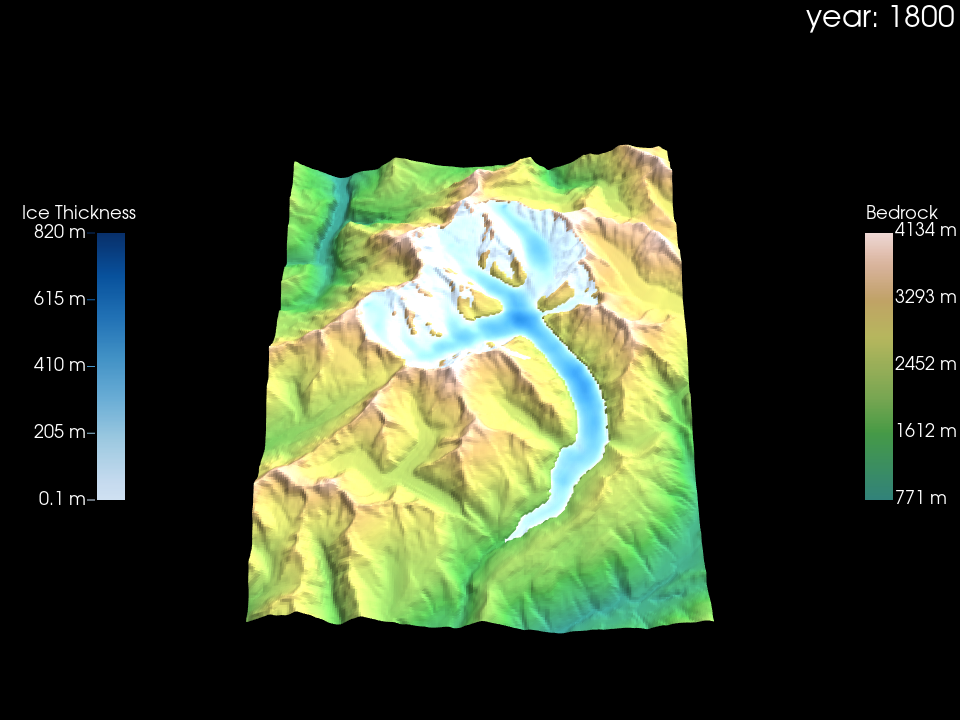

In [20]:
kwargs_rotate_camera_trajectory = dict(start_angle=0,
                                       end_angle=180,
                                       camera_height=10,
                                       camera_radius=2,
                                       camera_radius_reference=None,
                                       )

viz.export_animation(filename='rotating_camera_example.mp4',
                     camera_trajectory='rotate',
                     kwargs_camera_trajectory=kwargs_rotate_camera_trajectory
                     )